In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from IPython.display import display

In [3]:
banking_data = pd.read_excel('./data/Churn-Modelling.xlsx')
banking_data.drop('RowNumber', axis=1, inplace=True)
banking_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
def chi_square(df, feature, target):
    
    table = pd.crosstab(df[feature], df[target])
    _, p, *_ = stats.chi2_contingency(table.values)
    
    return p

def chi2_significance_test(df, feature, target, confidence_level = .05):
    p = chi_square(df, feature, target)
    
    return p < confidence_level
        
    
total_number_of_samples = banking_data.shape[0]

proportion_leaving = banking_data['Exited'].sum() / total_number_of_samples

print(f"The proportion of customers leaving: {proportion_leaving*100:.0f}%")

The proportion of customers leaving: 20%


Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


p = 0.0000


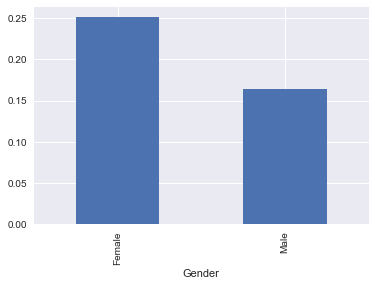

In [48]:
banking_data_gender = banking_data.groupby('Gender')
gender_proportion = banking_data_gender['Exited'].mean()

table = pd.crosstab(banking_data['Gender'], banking_data['Exited'])

display(table)

chi2, p, dof, expected = stats.chi2_contingency(table.values)

gender_proportion.plot.bar()

print(f'p = {p:.4f}')

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


p = 0.4924


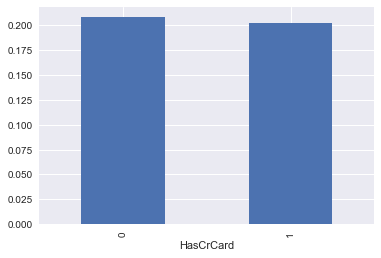

In [46]:
banking_data_card = banking_data.groupby('HasCrCard')
card_proportion = banking_data_card['Exited'].mean()

table = pd.crosstab(banking_data['HasCrCard'], banking_data['Exited'])

display(table)

chi2, p, dof, expected = stats.chi2_contingency(table.values)

card_proportion.plot.bar()
print(f'p = {p:.4f}')

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


p = 0.0000


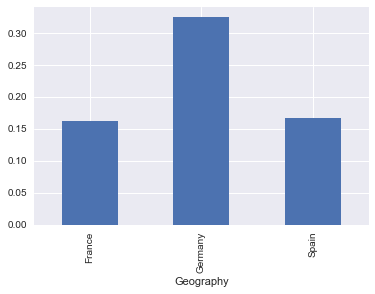

In [47]:
table = pd.crosstab(banking_data['Geography'], banking_data['Exited'])

display(table)

chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'p = {p:.4f}')
banking_data.groupby('Geography')['Exited'].mean().plot.bar()

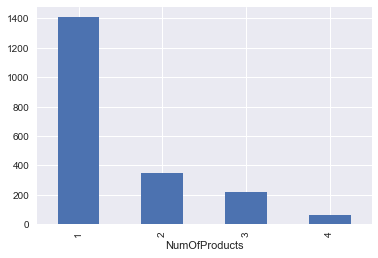

In [27]:
banking_data.groupby('NumOfProducts')['Exited'].sum().plot.bar()

In [9]:
banking_data['Validation'] = banking_data['CustomerId'] % 10
banking_data.drop('CustomerId', axis=1, inplace=True)
banking_data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Validation
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,4
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,4
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,8


In [10]:
banking_data_validation = banking_data.groupby('Validation')
table = pd.crosstab(banking_data['Validation'], banking_data['Exited'])

display(table)

chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'p = {p:.4f}')
proportion(banking_data_validation, 'Exited').plot.bar()

Exited,0,1
Validation,,
0,796,213
1,803,214
2,781,189
3,750,213
4,847,203
5,785,176
6,811,224
7,787,201
8,778,218


p = 0.2771


NameError: name 'proportion' is not defined

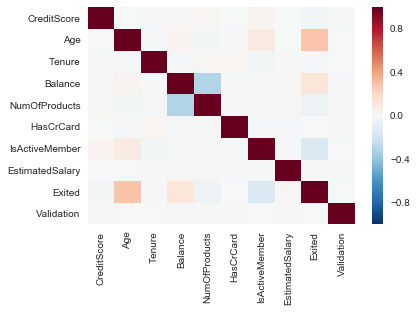

In [11]:
corr = banking_data.corr()

sns.heatmap(corr)

In [12]:
f = lambda col: chi2_significance_test(banking_data, col, 'Exited')
for col in banking_data.columns[:-2]:
    print(f"{col} significant {f(col)}")

Surname significant False
CreditScore significant True
Geography significant True
Gender significant True
Age significant True
Tenure significant False
Balance significant True
NumOfProducts significant True
HasCrCard significant False
IsActiveMember significant True
EstimatedSalary significant False


In [13]:
cols = ['Surname', 'Tenure', 'HasCrCard', 'EstimatedSalary', 'Validation', 'Exited']
target = banking_data['Exited']
data = banking_data.drop(cols, axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1


In [14]:
data=pd.get_dummies(data)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .3)

cls = LogisticRegression()

cls.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
accuracy_score(y_test, cls.predict(X_test))

0.78866666666666663

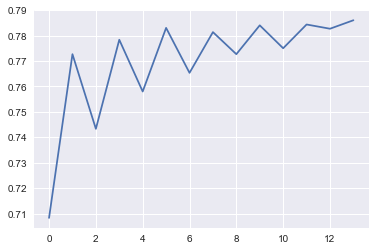

In [17]:
acc = []
for k in range(1, 15):
    cls = KNeighborsClassifier(k)
    cls.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, cls.predict(X_test)))
    
plt.plot(acc)

In [18]:
cls = SVC()
cls.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
accuracy_score(y_test, cls.predict(X_test))

0.79533333333333334

In [20]:
cls = DecisionTreeClassifier(max_depth=5)
cls.fit(X_train, y_train)
accuracy_score(y_test, cls.predict(X_test))

0.85899999999999999

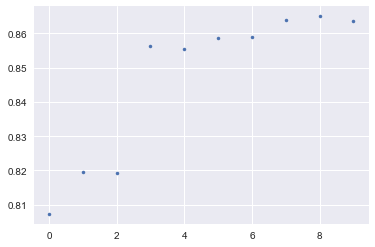

In [21]:
acc = []
for n in range(1, 11):
    cls = RandomForestClassifier(max_depth=n)
    cls.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, cls.predict(X_test)))
    
plt.plot(acc,'.')

In [22]:
cls = MLPClassifier(activation='logistic', alpha=.0000001)
cls.fit(X_train, y_train)
accuracy_score(y_test, cls.predict(X_test))

0.79433333333333334

In [23]:
cls = AdaBoostClassifier()
cls.fit(X_train, y_train)
accuracy_score(y_test, cls.predict(X_test))

0.85799999999999998

In [38]:
cls = GaussianNB()
cls.fit(X_train, y_train)
accuracy_score(y_test, cls.predict(X_test))

0.78500000000000003